# Wykres DFT przy użyciu numpy.fft

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [95]:
plt.style.use('ggplot')
colors = ["tomato", "dodgerblue", "yellow","yellowgreen", "mediumorchid"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors) 

In [5]:
def samples(f, samplingRate):
    X = np.linspace(0, 2*np.pi, samplingRate)
    a = np.array([f(x) for x in X])
    return (a, X)

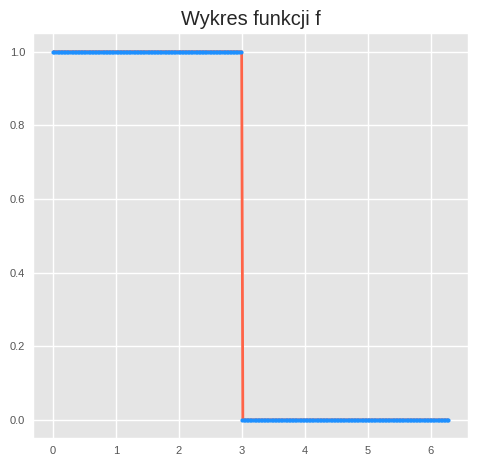

In [88]:
def f(t):
    if t <= 3:
        return 1 
    else:
        return 0

a, x = samples(f, 256)
aDraw, xDraw = samples(f, 2048)

plt.figure(figsize = (5, 5))
plt.title("Wykres funkcji f")
plt.plot(xDraw, aDraw)
plt.plot(x, a, 'o', markersize=3)

plt.show()

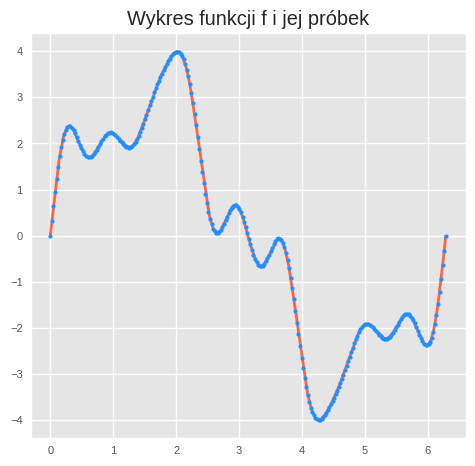

In [121]:
# pary (częstotliwość, mnożnik)
sineComponents = [ (1, 3), (4, 1), (7, 0.5), (9, 0.3) ]

def f(t):
    value = 0
    for (freq, mul) in sineComponents:
        value += mul*np.sin(freq*t)
    return value

a, x = samples(f, 256)
aDraw, xDraw = samples(f, 2048)

plt.figure(figsize = (5, 5))
plt.title("Wykres funkcji f i jej próbek")
plt.plot(xDraw, aDraw)
plt.plot(x, a, 'o', markersize=3)

plt.show()

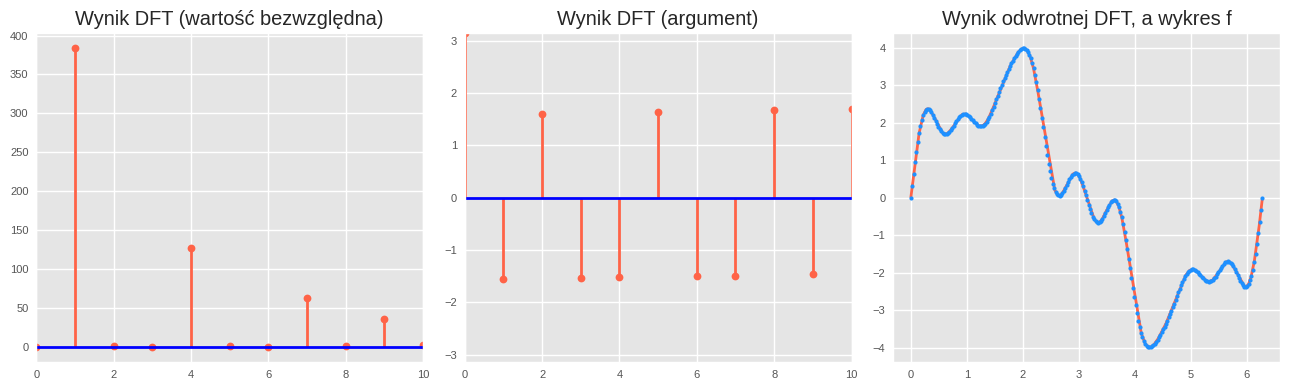

In [123]:
A = np.fft.fft(a)
freq = np.arange(len(a))

plt.figure(figsize = (13, 4))

plt.subplot(131)
plt.title("Wynik DFT (wartość bezwzględna)")
plt.stem(freq, np.abs(A), basefmt="-b")
plt.xlim(0, 10)

plt.subplot(132)
plt.title("Wynik DFT (argument)")
plt.stem(freq, np.angle(A), basefmt="-b")
plt.ylim(-np.pi, np.pi)
plt.xlim(0, 10)

plt.subplot(133)
plt.title("Wynik odwrotnej DFT, a wykres f")
plt.plot(xDraw, aDraw)
plt.plot(x, np.real(np.fft.ifft(A)), 'o', markersize=3)

plt.tight_layout()
plt.show()

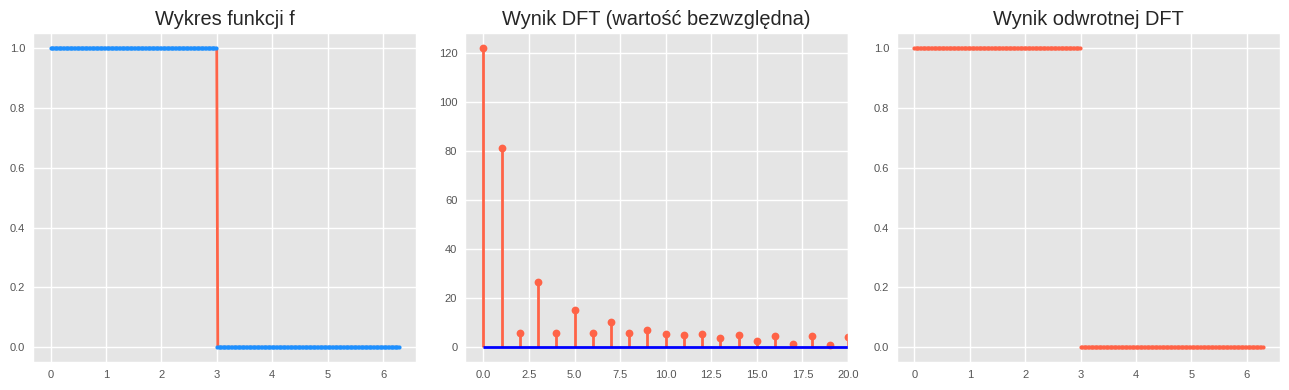

In [89]:
A = np.fft.fft(a)
freq = np.arange(len(a))

plt.figure(figsize = (13, 4))


plt.subplot(131)
plt.title("Wykres funkcji f")
plt.plot(xDraw, aDraw)
plt.plot(x, a, 'o', markersize=3)

plt.subplot(132)
plt.title("Wynik DFT (wartość bezwzględna)")
plt.stem(freq, np.abs(A), basefmt="-b")
plt.xlim(-1, 20)

plt.subplot(133)
plt.title("Wynik odwrotnej DFT")
plt.plot(x, np.real(np.fft.ifft(A)), 'o', markersize=3)

plt.tight_layout()
plt.show()

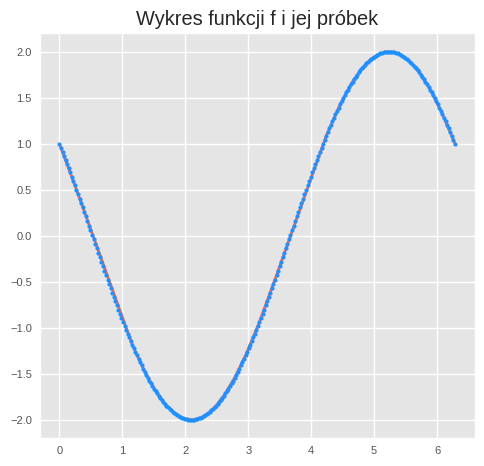

In [90]:
def f(t):
    return 2*np.cos(t + np.pi/3)

a, x = samples(f, 256)
aDraw, xDraw = samples(f, 2048)

plt.figure(figsize = (5, 5))
plt.title("Wykres funkcji f i jej próbek")
plt.plot(xDraw, aDraw)
plt.plot(x, a, 'o', markersize=3)

plt.show()

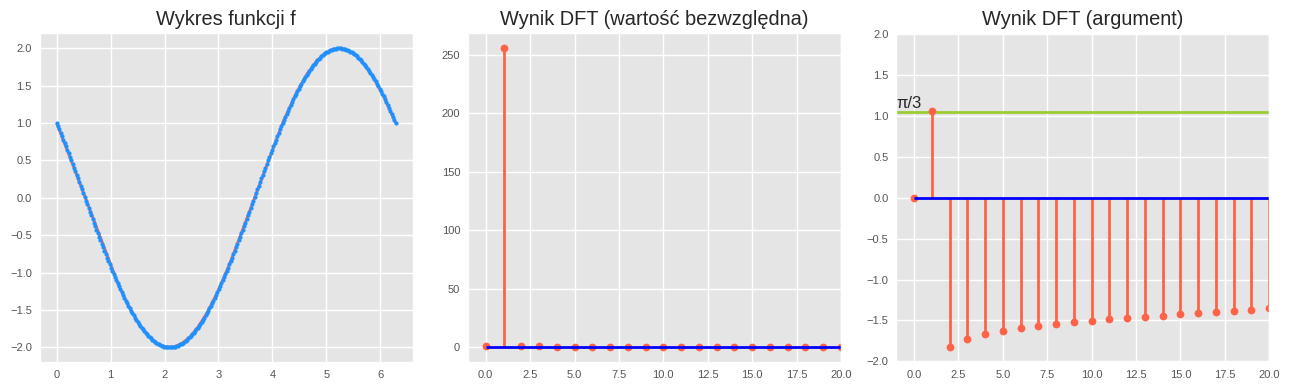

In [120]:
A = np.fft.fft(a)
freq = np.arange(len(a))

plt.figure(figsize = (13, 4))


plt.subplot(131)
plt.title("Wykres funkcji f")
plt.plot(xDraw, aDraw)
plt.plot(x, a, 'o', markersize=3)

plt.subplot(132)
plt.title("Wynik DFT (wartość bezwzględna)")
plt.xlim(-1, 20)
plt.stem(freq, np.abs(A), basefmt="-b")

plt.subplot(133)
plt.title("Wynik DFT (argument)")
angle = np.pi/3
plt.axhline(angle, color=colors[3])
plt.text(-1, angle+0.05,"π/3", fontsize=12)
plt.stem(freq, np.angle(A), basefmt="-b")

plt.xlim(-1, 20)

plt.tight_layout()
plt.show()

# Implementacja FFT (Cooley-Tukey Radix 2-DIT)

In [9]:
def fft(a):
    
    if(len(a) == 1):
        return np.array(a)
    
    even = a[::2]
    odd = a[1::2]
    E = fft(even)
    O = fft(odd)
    
    dft1 = E  + np.exp(-2*np.pi*1j/len(a)*np.arange(len(a)/2)) * O
    dft2 = E - np.exp(-2*np.pi*1j/len(a)*np.arange(len(a)/2)) * O

    return np.concatenate( (dft1, dft2) )

In [10]:
def swapImRe(x):
    return np.imag(x) + 1j*np.real(x)

def ifft(A):
    a = swapImRe(A)
    a = fft(a)
    a = swapImRe(a)
    a /= len(a)
    return a

/home/sarcoramphus/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


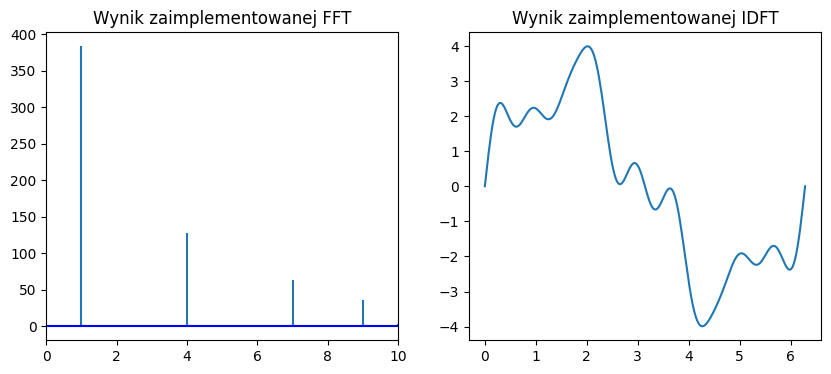

In [11]:
A = fft(a)

plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.title("Wynik zaimplementowanej FFT")
plt.stem(freq, np.abs(A), markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.subplot(122)
plt.title("Wynik zaimplementowanej IDFT")
plt.plot(x, ifft(A))

plt.show()

# Porównanie z obliczaniem z definicji

In [12]:
def dft(a):
    omega = np.exp(1j* 2* np.pi / len(a))
    return [ np.sum(a * omega**(-k * np.arange(len(a)) )) for k in np.arange(len(a))]

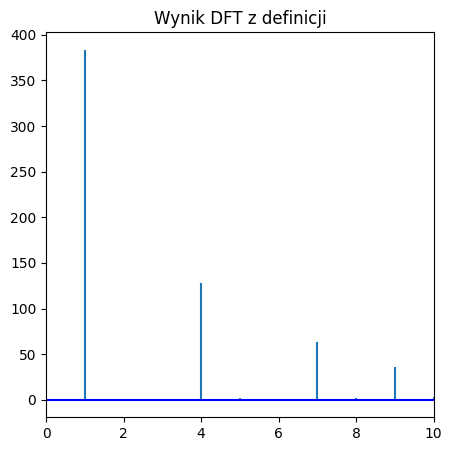

In [13]:
A = dft(a)

plt.figure(figsize = (5, 5))
plt.title("Wynik DFT z definicji")
plt.stem(freq, np.abs(A), markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.show()

In [14]:
a, x = samples(f, 2048)

start = time.process_time()
fft(a)
end = time.process_time()
print("FFT:", end-start, "sekundy")

start = time.process_time()
dft(a)
end = time.process_time()
print("Z definicji:", end-start, "sekundy")

FFT: 0.08031604399999992 sekundy
Z definicji: 2.781482295 sekundy


# Wielowymiarowa FFT

In [15]:
def grating(canvasSize, wavelength, angle, phase, amplitude):
    x = np.arange(canvasSize)
    X, Y = np.meshgrid(x, x)
    g = np.sin( phase + 2*np.pi * (X*np.cos(angle) + Y*np.sin(angle)) / wavelength )
    return g

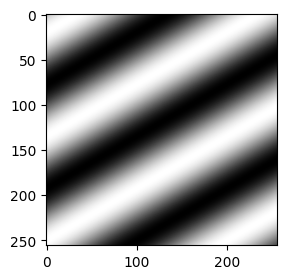

In [16]:
a = grating(256, 100, np.pi/3, 0.5, 1)
plt.figure(figsize=[3,3])
plt.set_cmap("gray")
plt.imshow(a)
plt.show()

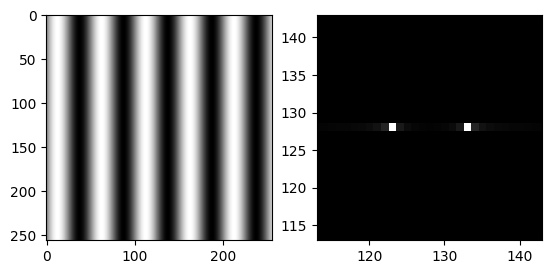

In [17]:
canvasSize = 256
a = grating(canvasSize, 50, 0, 0, 1)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(a)

A = np.fft.ifftshift(a)
A = np.fft.fft2(A)
A = np.fft.fftshift(A)

plt.subplot(122)
plt.imshow(np.abs(A))

offset = 15
plt.xlim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.ylim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.show()

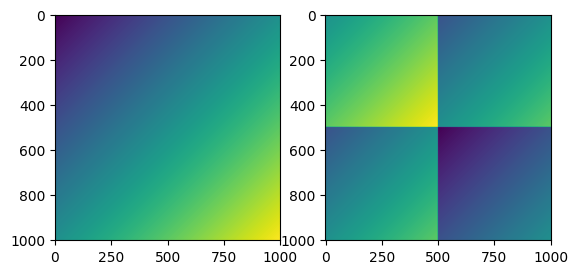

In [18]:
# sprawdzenie FFT shift

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
gradient = Y+X

plt.set_cmap("viridis")

plt.subplot(121)
plt.imshow(gradient)

plt.subplot(122)
plt.imshow(np.fft.fftshift(gradient))

plt.show()

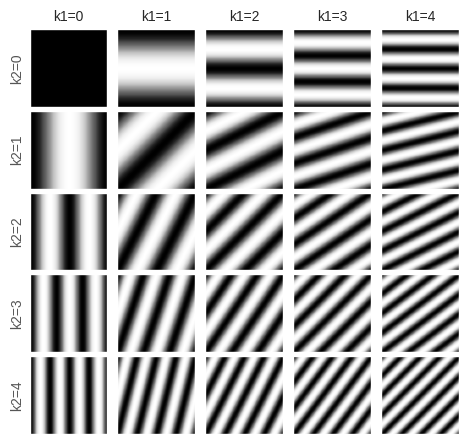

In [199]:
# baza 2D - część rzeczywista
# -1 - biały, 1 - czarny 

n = 5

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(5, 5))

canvasSize = 64
x = np.arange(canvasSize)
X, Y = np.meshgrid(x, x)

for k1 in range(0, n):
    for k2 in range(0, n):
        baseVector = np.real( np.exp( 1j*k1*X / canvasSize * 2 * np.pi ) * np.exp( 1j*k2*Y / canvasSize * 2 * np.pi) )
        axes[k1, k2].imshow(baseVector, vmin=-1, vmax=1)

for axs in axes:
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

for i in range(n):
    axes[0, i].set_title('k1='+str(i), fontsize=10)
    axes[i, 0].set_ylabel('k2='+str(i), fontsize=10)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

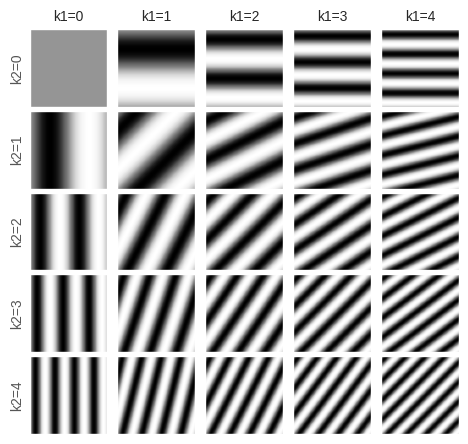

In [200]:
# baza 2D - część urojona
n = 5

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(5, 5))

canvasSize = 64
x = np.arange(canvasSize)
X, Y = np.meshgrid(x, x)

for k1 in range(0, n):
    for k2 in range(0, n):
        baseVector = np.imag( np.exp( 1j*k1*X / canvasSize * 2 * np.pi ) * np.exp( 1j*k2*Y / canvasSize * 2 * np.pi) )
        axes[k1, k2].imshow(baseVector, vmin=-1, vmax=1)

for axs in axes:
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

for i in range(n):
    axes[0, i].set_title('k1='+str(i), fontsize=10)
    axes[i, 0].set_ylabel('k2='+str(i), fontsize=10)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

# Implementacja 2D FFT

In [19]:
def row_columnFFT(a):
    
    A = np.array(a, dtype=np.complex128)
    for i in range(len(A)):
        row = A[i]
        A[i] = fft(row)

    A = A.T
    for i in range(len(A)):
        col = A[i]
        A[i] = fft(col)
    A = A.T
    return A

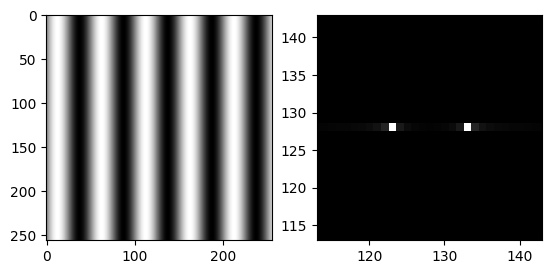

In [20]:
a = grating(canvasSize, 50, 0, 0, 1)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(a)

A = np.fft.ifftshift(a)
A = row_columnFFT(A)
A = np.fft.fftshift(A)

plt.subplot(122)
plt.imshow(np.abs(A))

offset = 15
plt.xlim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.ylim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.show()

In [96]:
def omega(N):
    return np.exp(2*np.pi*1j / N)

def vector_radixFFT(a):

    if a.shape == (1,1):
        return a
    
    N1 = a.shape[0]
    N2 = a.shape[1]
    halfN1 = int(N1/2)
    halfN2 = int(N2/2)

    partDFT = [ [[], []], [[], []]]
    for q1 in range(2):
        for q2 in range(2):
            subsequence = a[q1::2, q2::2]
            partDFT[q1][q2] = vector_radixFFT(subsequence)

    u1 = np.arange(halfN1).reshape(halfN1, 1)
    u2 = np.arange(halfN2).reshape(1, halfN2)

    partDFT[0][1] = partDFT[0][1] * omega(N2)**u2
    partDFT[1][0] = partDFT[1][0] * omega(N1)**u1 
    partDFT[1][1] = partDFT[1][1] * omega(N1)**u1*omega(N2)**u2

    DFT = np.zeros( (N1, N2), dtype = np.complex128)

    # for v1 in range(2):
    #     for v2 in range(2):
    #         slice = np.zeros( (halfN1, halfN2), dtype=np.complex128)
    #         for q1 in range(2):
    #             for q2 in range(2):
    #                 slice = slice + partDFT[q1][q2] * omega(2)**(-q1*v1) * omega(2)**(-q2*v2)
    #         DFT[ v1*halfN1 : (v1+1)*halfN1, v2*halfN2 : (v2+1)*halfN2 ] = DFT[ v1*halfN1 : (v1+1)*halfN1, v2*halfN2 : (v2+1)*halfN2 ] + slice

    DFT = np.empty((N1, N2), dtype=np.complex128)
    DFT[ 0 : halfN1, 0 : halfN2 ] =  partDFT[0][0] + partDFT[0][1] + partDFT[1][0] + partDFT[1][1]
    DFT[ halfN1:N1, 0:halfN2] = partDFT[0][0] + partDFT[0][1] - partDFT[1][0] - partDFT[1][1]
    DFT[ 0:halfN1, halfN2:N2] = partDFT[0][0] - partDFT[0][1] + partDFT[1][0] - partDFT[1][1]
    DFT[ halfN1:N1, halfN2:N2] = partDFT[0][0] - partDFT[0][1] - partDFT[1][0] + partDFT[1][1]

    return DFT

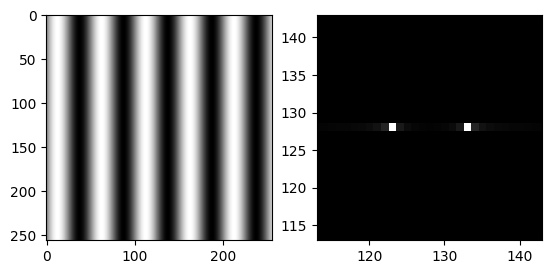

In [98]:
a = grating(canvasSize, 50, 0, 0, 1)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(a)

A = np.fft.ifftshift(a)
A = vector_radixFFT(A)
A = np.fft.fftshift(A)

plt.subplot(122)
plt.imshow(np.abs(A))

offset = 15
plt.xlim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.ylim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.show()

# Porównanie czasów metod obliczania 2D FFT

In [70]:
def dft2d(a):
    N1 = a.shape[0]
    N2 = a.shape[1]
    A = np.zeros(a.shape, dtype=np.complex128)

    for k1 in range(N1):
        for k2 in range(N2):
            for n1 in range(N1):
                for n2 in range(N2):
                    A[k1, k2] += a[n1, n2] * omega(N1)**(-k1*n1) * omega(N2)**(-k2*n2)

    return A

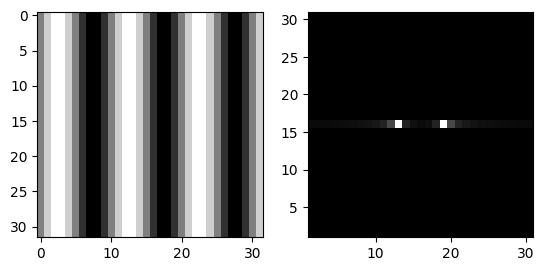

In [71]:
canvasSize = 32
a = grating(canvasSize, 10, 0, 0, 1)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(a)

A = np.fft.ifftshift(a)
A = dft2d(A)
A = np.fft.fftshift(A)

plt.subplot(122)
plt.imshow(np.abs(A))

offset = 15
plt.xlim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.ylim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.show()

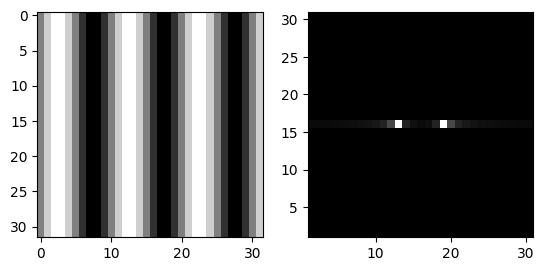

In [72]:
canvasSize = 32
a = grating(canvasSize, 10, 0, 0, 1)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(a)

A = np.fft.ifftshift(a)
A = np.fft.fft2(A)
A = np.fft.fftshift(A)

plt.subplot(122)
plt.imshow(np.abs(A))

offset = 15
plt.xlim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.ylim([canvasSize/2 - offset, canvasSize/2 + offset])
plt.show()

In [74]:
a = grating(32, 10, 0, 0, 1)

start = time.process_time()
dft2d(a)
end = time.process_time()
print("Z definicji:", end-start, "sekundy")

start = time.process_time()
row_columnFFT(a)
end = time.process_time()
print("Row-column:", end-start, "sekundy")

start = time.process_time()
vector_radixFFT(a)
end = time.process_time()
print("Vector-radix:", end-start, "sekundy")

Z definicji: 9.876322260000052 sekundy
Row-column: 0.06405988100004834 sekundy
Vector-radix: 0.04480503500008126 sekundy


In [75]:
a = grating(2**10, 50, 0, 0, 1)

start = time.process_time()
row_columnFFT(a)
end = time.process_time()
print("Row-column:", end-start, "sekundy")

start = time.process_time()
vector_radixFFT(a)
end = time.process_time()
print("Vector-radix:", end-start, "sekundy")

Row-column: 66.24278404699999 sekundy
Vector-radix: 48.615740851000055 sekundy
